In [1]:
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets.samples_generator import make_blobs

In [2]:
#Generar datos random de ejemplo
np.random.seed(0)
centers=[[1,1],[1,-1],[-1,-1]]
n_clusters=len(centers)
X,labels=make_blobs(n_samples=100000,centers=centers,cluster_std=0.7)

In [3]:
#ejecutar algoritmo kmeans
k_means = KMeans(init="k-means++",n_clusters=len(centers),n_init=10)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_clusters_centers = k_means.cluster_centers_
k_means_labels_unique = np.unique(k_means_labels)
print(k_means_clusters_centers)

[[ 0.99125259  1.04691818]
 [ 1.06226617 -1.04738961]
 [-1.04909829 -0.99746081]]


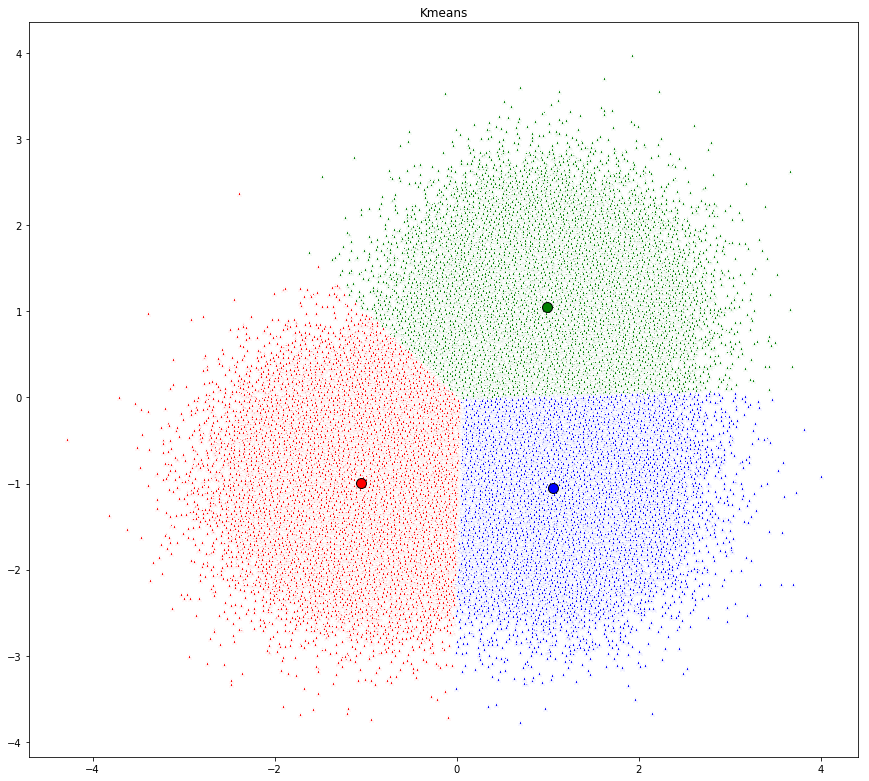

In [4]:
#Plot result
fig = pl.figure(figsize=(12,12))
fig.subplots_adjust(left=0.02,right=0.98,bottom=0.05,top=0.9)
colors = ['green','blue','red']

distance =euclidean_distances(k_means_clusters_centers,squared=True)
order=distance.argmin(axis=1)

ax= fig.add_subplot(1,1,1)
for k,col in zip(range(n_clusters),colors):
    cluster_member = k_means_labels == k
    cluster_center =k_means_clusters_centers[k]
    ax.plot(X[cluster_member,0],X[cluster_member,1],'w',markerfacecolor=col,marker='*')
    ax.plot(cluster_center[0],cluster_center[1],'o',markeredgecolor='k', markerfacecolor=col,markersize=10)
    
ax.set_title('Kmeans')
pl.show()